<h1>Customer Attrition / Churn Model</h1>
<h2>Project Details</h2>

This project aims to train a machine learning model that best describes the event of <strong>customer churn</strong> in the banking industry, thereby allowing banks to take preemptive measures to combat it by analyzing the factors that contribute the most to churn.

It presents a <strong>full machine learning work flow</strong>, using 8 Machine Learning algorithms, use GridSearchCV to tune their parameters and summarize the best of them using their accuracy scores for the validation set. 


<font color = 'brown'>
 CONTENTS:  
    
   1. [Introduction and Setting Up](#1)
       * 1.1 [Summary Information about the variables and their types in the data](#1.1)
   2. [Exploratory Data Analysis](#2)
       * 2.1 [Basic statistics about the data](#2.1)            
       * 2.2 [Visualizations](#2.2)
           * 2.2.1 [Correlation matrix heatmap](#2.2.1)
           * 2.2.2 [Tenure and Exited](#2.2.2)
           * 2.2.3 [Gender versus Exited](#2.2.3)
           * 2.2.4 [Age versus Exited](#2.2.4)
           * 2.2.5 [Balance versus Survived](#2.2.5)
           * 2.2.6 [EstimatedSalary versus Exited](#2.2.6)
           * 2.2.7 [Creeditscore versus Exited](#2.2.7)
   3. [Data Preprocessing](#3) 
       * 3.1 [Removing Irrelevant Attributes](#3.1) 
       * 3.2 [Handling Categorical Variables](#3.2)
           * 3.2.1 [Label encoding of gender variable and removing surname](#3.2.1)            
           * 3.2.3 [One hot encoding of Geography (Country)](#3.2.2)   
       * 3.3 [Splitting the data as train and validation data](#3.3) 
   4. [Modeling, Model Evaluation and Model Tuning](#4)
       * 4.1 [Validation Set Test Accuracy for the default models](#4.1) 
       * 4.2 [Cross validation accuracy and std of the default models for all the train data](#4.2)    
       * 4.3 [Hyperparameter tuning using GridSearchCV](#4.3)   
       * 4.4 [Ensembling the best 3 models](#4.4) 
   4. [Using the models to determine the most important attributes](#5)
 

# 1. Introduction and Setting Up<a id = '1'></a><br> 
Loading the data and required libraries and getting a basic understanding of data

In [96]:
import numpy as np
import pandas as pd
import re

# data viz:
import matplotlib.pyplot as plt
import seaborn as sns

# to ignore warnings:
import sys
if not sys.warnoptions:
    import os, warnings
    warnings.simplefilter("ignore") 
    os.environ["PYTHONWARNINGS"] = "ignore" 

#timer
import time
from contextlib import contextmanager

# Importing modelling libraries
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,VotingClassifier,BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing import OneHotEncoder
pd.options.display.float_format = "{:,.2f}".format

#display all columns:
pd.set_option('display.max_columns', None)

In [13]:
dataFrame = pd.read_csv('.\Churn_Modelling.csv')

In [16]:
dataFrame.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,"101,348.88",1
1,2,15647311,Hill,608,Spain,Female,41,1,"83,807.86",1,0,1,"112,542.58",0
2,3,15619304,Onio,502,France,Female,42,8,"159,660.80",3,1,0,"113,931.57",1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,"93,826.63",0
4,5,15737888,Mitchell,850,Spain,Female,43,2,"125,510.82",1,1,1,"79,084.10",0


In [19]:
dataFrame.shape

(10000, 14)

## 1.1 Summary Information about the variables and their types in the data <a id = '1.1'></a><br>

* <strong>Surname</strong>          : The surname of the customer
* <strong>CreditScore</strong>      : The credit score of the customer
* <strong>Geography</strong>        : The country of the customer(Germany/France/Spain)
* <strong>Gender</strong>           : The gender of the customer (Female/Male)
* <strong>Age</strong>              : The age of the customer  
* <strong>Tenure</strong>           : The customer's number of years in the bank 
* <strong>Balance</strong>          : The customer's account balance
* <strong>NumOfProducts</strong>    : The number of bank products that the customer uses 
* <strong>HasCrCard</strong>        : Does the customer have a card? (0:No, 1:Yes) 
* <strong>IsActiveMember</strong>   : Does the customer have an active mebership (0:No, 1:Yes) 
* <strong>EstimatedSalary</strong>  : The estimated salary of the customer
* <strong>Exited</strong>           : Churned or not? (0:No, 1:Yes) 

# 2. Exploratory Data Analysis <a id = '2'></a><br> 

## 2.1 Basic summary statistics about the data <a id = '2.1'></a><br>

In [21]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [23]:
dataFrame.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,"10,000.00","5,000.50","2,886.90",1.00,"2,500.75","5,000.50","7,500.25","10,000.00"
CustomerId,"10,000.00","15,690,940.57","71,936.19","15,565,701.00","15,628,528.25","15,690,738.00","15,753,233.75","15,815,690.00"
CreditScore,"10,000.00",650.53,96.65,350.00,584.00,652.00,718.00,850.00
Age,"10,000.00",38.92,10.49,18.00,32.00,37.00,44.00,92.00
Tenure,"10,000.00",5.01,2.89,0.00,3.00,5.00,7.00,10.00
Balance,"10,000.00","76,485.89","62,397.41",0.00,0.00,"97,198.54","127,644.24","250,898.09"
NumOfProducts,"10,000.00",1.53,0.58,1.00,1.00,1.00,2.00,4.00
HasCrCard,"10,000.00",0.71,0.46,0.00,0.00,1.00,1.00,1.00
IsActiveMember,"10,000.00",0.52,0.50,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,"10,000.00","100,090.24","57,510.49",11.58,"51,002.11","100,193.91","149,388.25","199,992.48"


In [34]:
    for attribute in dataFrame:
        if attribute != 'Exited':
            if len(list(dataFrame[attribute].unique())) <= 11:
                    print(pd.DataFrame({'Mean_Exited': dataFrame.groupby(attribute)['Exited'].mean()}), end = "\n"+"-"*25+"\n" )

           Mean_Exited
Geography             
France            0.16
Germany           0.32
Spain             0.17
-------------------------
        Mean_Exited
Gender             
Female         0.25
Male           0.16
-------------------------
        Mean_Exited
Tenure             
0              0.23
1              0.22
2              0.19
3              0.21
4              0.21
5              0.21
6              0.20
7              0.17
8              0.19
9              0.22
10             0.21
-------------------------
               Mean_Exited
NumOfProducts             
1                     0.28
2                     0.08
3                     0.83
4                     1.00
-------------------------
           Mean_Exited
HasCrCard             
0                 0.21
1                 0.20
-------------------------
                Mean_Exited
IsActiveMember             
0                      0.27
1                      0.14
-------------------------


## 2.2 Visualizations <a id = '2.2'></a><br> 
This section is for illustrating the relationships between attributes using visualization tools.

### 2.2.1 Correlation matrix <a id = '2.2.1'></a><br>

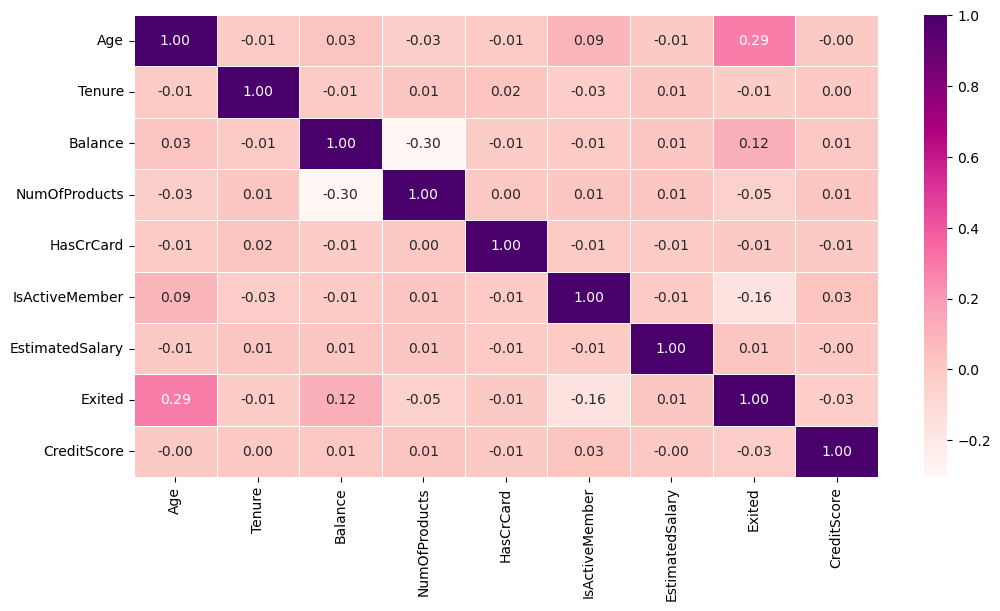

In [53]:
# Select numeric columns for correlation matrix
columns_to_select = list(df.loc[:, 'Age':'Exited'].columns) + ['CreditScore']

selected_columns = df[columns_to_select]


fig, ax = plt.subplots(figsize=(12,6)) 
sns.heatmap(dataFrame.loc[:,columns_to_select].corr(), annot = True, fmt = ".2f", linewidths=0.5, ax=ax, cmap = 'RdPu') 
plt.show()

<strong>We can see that none of the attribute pairs have particularly high correlation</strong>


### 2.2.2 Tenure and Exited <a id = '2.2.2'></a><br>       

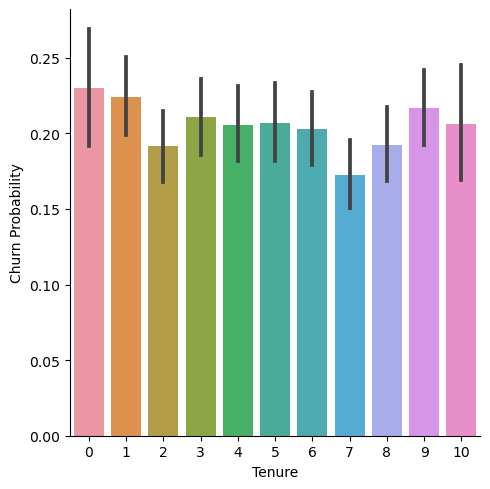

In [59]:
g= sns.catplot(x = "Tenure", y = "Exited", data = dataFrame, kind = "bar")
g.set_ylabels("Churn Probability")
plt.show()

 ### 2.2.3 Gender and Exited <a id = '2.2.3'></a><br>       

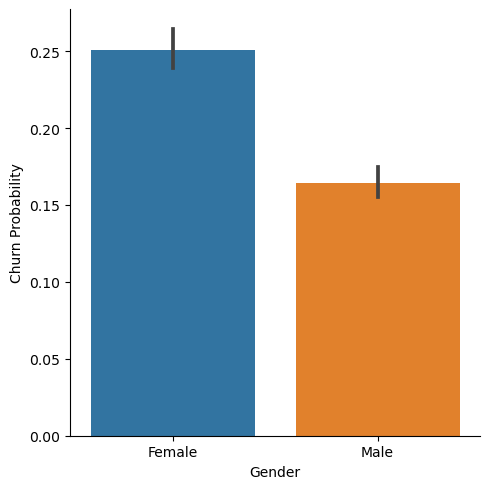

In [61]:
g= sns.catplot(x = "Gender", y = "Exited", data = dataFrame, kind = "bar")
g.set_ylabels("Churn Probability")
plt.show()

We see that female customers exit more

 ### 2.2.4 Age versus Exited <a id = '2.2.4'></a><br>   

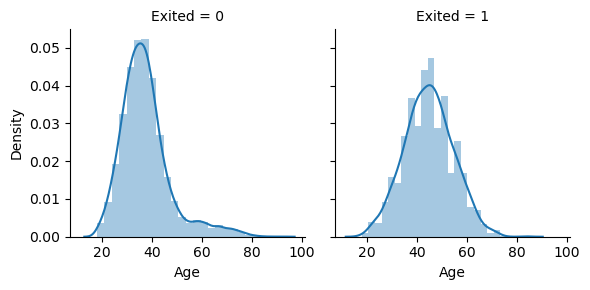

In [62]:
g= sns.FacetGrid(df, col = "Exited")
g.map(sns.distplot, "Age", bins = 25)
plt.show()

 ### 2.2.5 Balance versus Exited <a id = '2.2.5'></a><br>   

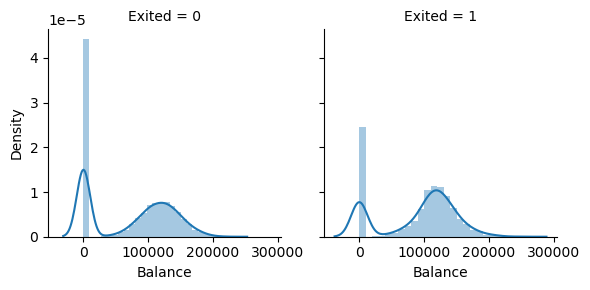

In [63]:
g= sns.FacetGrid(df, col = "Exited")
g.map(sns.distplot, "Balance", bins = 25)
plt.show()

 ### 2.2.6 EstimatedSalary versus Exited <a id = '2.2.6'></a><br>   

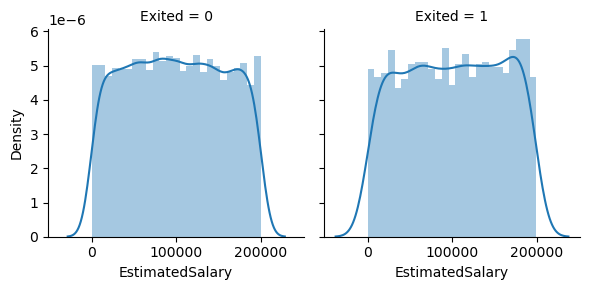

In [65]:
g= sns.FacetGrid(df, col = "Exited")
g.map(sns.distplot, "EstimatedSalary", bins = 25)
plt.show()

 Although the they are similar, there seems to be slightly higher salaries for the exited customers.

 ## 2.2.7 Creeditscore versus Exited <a id = '2.2.7'></a><br>   

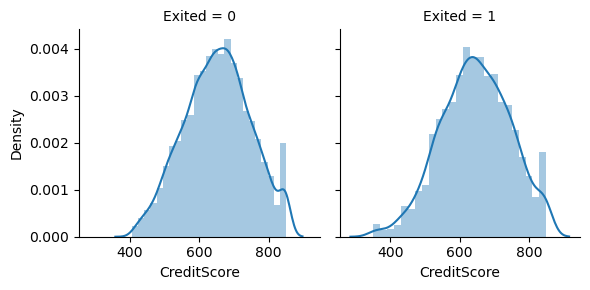

In [66]:
g= sns.FacetGrid(df, col = "Exited")
g.map(sns.distplot, "CreditScore", bins = 25)
plt.show()

# 3. Data Preprocessing <a id = '3'></a><br> 



No missing values as evident from section [2.1](#2.1) allows us to proceed without imputing.

## 3.1 Removing Irrelevant Attributes <a id = '3.1'></a><br>


We see that the 'Surname', 'CustomerId', and 'RowNumber' attributes are completely irrelevant to our machine learning model and would only lead to underperforming algorithms.

In [116]:
df = dataFrame.drop(columns = ['Surname', 'RowNumber'], axis = 1)
df

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,"101,348.88",1
1,15647311,608,Spain,Female,41,1,"83,807.86",1,0,1,"112,542.58",0
2,15619304,502,France,Female,42,8,"159,660.80",3,1,0,"113,931.57",1
3,15701354,699,France,Female,39,1,0.00,2,0,0,"93,826.63",0
4,15737888,850,Spain,Female,43,2,"125,510.82",1,1,1,"79,084.10",0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,"96,270.64",0
9996,15569892,516,France,Male,35,10,"57,369.61",1,1,1,"101,699.77",0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,"42,085.58",1
9998,15682355,772,Germany,Male,42,3,"75,075.31",2,1,0,"92,888.52",1


## 3.2 Handling Categorical Variables <a id = '3.2'></a><br>

### 3.2.1 Label encoding of gender attribute <a id = '3.2.1'></a><br>

In [117]:
for df in [df]:
    df["Gender"]=df["Gender"].map(lambda x: 0 if x=='Female' else 1)

### 3.2.2 One hot encoding of Geography (Country) <a id = '3.2.2'></a><br>

In [118]:
encoder = OneHotEncoder(drop='first', sparse=False)

In [119]:
encoded_country = encoder.fit_transform(df[['Geography']])

encoded_geo_df = pd.DataFrame(encoded_country, columns=encoder.get_feature_names_out(['Geography']))
encoded_geo_df

df_encoded = pd.concat([df, encoded_geo_df], axis=1).drop('Geography', axis=1)
df_encoded

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,15634602,619,0,42,2,0.00,1,1,1,"101,348.88",1,0.00,0.00
1,15647311,608,0,41,1,"83,807.86",1,0,1,"112,542.58",0,0.00,1.00
2,15619304,502,0,42,8,"159,660.80",3,1,0,"113,931.57",1,0.00,0.00
3,15701354,699,0,39,1,0.00,2,0,0,"93,826.63",0,0.00,0.00
4,15737888,850,0,43,2,"125,510.82",1,1,1,"79,084.10",0,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,1,39,5,0.00,2,1,0,"96,270.64",0,0.00,0.00
9996,15569892,516,1,35,10,"57,369.61",1,1,1,"101,699.77",0,0.00,0.00
9997,15584532,709,0,36,7,0.00,1,0,1,"42,085.58",1,0.00,0.00
9998,15682355,772,1,42,3,"75,075.31",2,1,0,"92,888.52",1,1.00,0.00


## 3.3 Splitting the data into train and validation sets <a id = '3.3'></a><br>

In [135]:
##
x = df_encoded.drop(["Exited"], axis=1)
target = df["Exited"]
x_train, x_val, y_train, y_val = train_test_split(x, target, test_size = 0.20, random_state = 0)

val_ids = x_val['CustomerId']
train_ids=x_train['CustomerId']

x_train = x_train.drop(['CustomerId'], axis=1)
x_val= x_val.drop(['CustomerId'], axis=1)

df_train=df[df['CustomerId'].isin(train_ids)]
df_val=df[df['CustomerId'].isin(val_ids)]

In [131]:
print("Training set shape : ",x_train.shape,"\n")
print("Validation set shape : ", x_val.shape)

Training set shape :  (8000, 10) 

Validation set shape :  (2000, 10)


# 4. Modeling, Evaluation and Model Tuning  <a id = '4'></a><br>

## 4.1 Validation Set Accuracy for the default models <a id = '4.1'></a><br>

In [150]:
r=42
models = [LogisticRegression(random_state=r),GaussianNB(), KNeighborsClassifier()
          ,BaggingClassifier(random_state=r),DecisionTreeClassifier(random_state=r),
          RandomForestClassifier(random_state=r), GradientBoostingClassifier(random_state=r),
          XGBClassifier(random_state=r), MLPClassifier(random_state=r),
          CatBoostClassifier(random_state=r,verbose = False)]
names = ["LogisticRegression","GaussianNB","KNN","Bagging",
             "DecisionTree","Random_Forest","GBM","XGBoost","Art.Neural_Network","CatBoost"]

In [151]:
print('Default model validation accuracies for the train data:', end = "\n\n")
for name, model in zip(names, models):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_val) 
    print(name,':',"%.3f" % accuracy_score(y_pred, y_val))

Default model validation accuracies for the train data:

LogisticRegression : 0.789
GaussianNB : 0.785
KNN : 0.764
Bagging : 0.855
DecisionTree : 0.797
Random_Forest : 0.868
GBM : 0.868
XGBoost : 0.853
Art.Neural_Network : 0.638
CatBoost : 0.864


## 4.2 Cross validation accuracy and Standard Deviation of the default models for all the train data <a id = '4.2'></a><br>

In [152]:
predictors=pd.concat([x_train,x_val])

In [153]:
results = []
print('5 fold Cross validation accuracy and std of the default models for the train data:', end = "\n\n")
for name, model in zip(names, models):
    kfold = KFold(n_splits=5)
    cv_results = cross_val_score(model, predictors, target, cv = kfold, scoring = "accuracy")
    results.append(cv_results)
    print("{}: {} ({})".format(name, "%.3f" % cv_results.mean() ,"%.3f" %  cv_results.std()))

5 fold Cross validation accuracy and std of the default models for the train data:

LogisticRegression: 0.796 (0.007)
GaussianNB: 0.796 (0.007)
KNN: 0.757 (0.006)
Bagging: 0.778 (0.004)
DecisionTree: 0.667 (0.008)
Random_Forest: 0.794 (0.007)
GBM: 0.796 (0.007)
XGBoost: 0.779 (0.009)
Art.Neural_Network: 0.779 (0.022)
CatBoost: 0.795 (0.007)


## 4.3 Hyperparameter tuning using GridSearchCV <a id = '4.3'></a><br>

In [154]:
# Input possible hyper parameters
logreg_params= {"C":np.logspace(-1, 1, 10),
                    "penalty": ["l1","l2"], "solver":['lbfgs', 'liblinear', 'sag', 'saga'], "max_iter":[1000]}

NB_params = {'var_smoothing': np.logspace(0,-9, num=100)}
knn_params= {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}
bag_params={"n_estimators":[50,120,300]}
dtree_params = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}
rf_params = {"max_features": ["log2","auto","sqrt"],
                "min_samples_split":[2,3,5],
                "min_samples_leaf":[1,3,5],
                "bootstrap":[True,False],
                "n_estimators":[50,100,150],
                "criterion":["gini","entropy"]}
gbm_params = {"learning_rate" : [0.001, 0.01, 0.1],
             "n_estimators": [100,500],
             "max_depth": [3,10],
             "min_samples_split": [2,10]}

xgb_params ={
        'n_estimators': [50, 100, 200],
        'subsample': [ 0.6,  1.0],
        'max_depth': [1,2,4],
        'learning_rate': [0.1, 0.3, 0.5],
        "min_samples_split": [1,4,6]}

mlpc_params = {"alpha": [0.1, 0.01, 0.0001],
              "hidden_layer_sizes": [(10,10),
                                     (100,100),
                                     (100),
                                     (3,5), 
                                     (5, 3)],
              "solver" : ["lbfgs","adam"],"max_iter":[1000]}
catb_params =  {'depth':[2, 3, 4],
              'loss_function': ['Logloss', 'CrossEntropy'],
              'l2_leaf_reg':np.arange(2,31)}
classifier_params = [logreg_params,NB_params,knn_params,bag_params,dtree_params,rf_params,
                     gbm_params, xgb_params,mlpc_params,catb_params]               
                  

In [156]:
# Tuning by GridSearchCV
cv_result = {}
best_estimators = {}
for name, model,classifier_param in zip(names, models,classifier_params):
    with timer(">Model tuning"):
        clf = GridSearchCV(model, param_grid=classifier_param, cv =5, scoring = "accuracy", n_jobs = -1,verbose = False)
        clf.fit(x_train,y_train)
        cv_result[name]=clf.best_score_
        best_estimators[name]=clf.best_estimator_
        print(name,'cross validation accuracy : %.3f'%cv_result[name])

>Model tuning... LogisticRegression cross validation accuracy : 0.812
Done! Elapsed time: 31.60 seconds.
>Model tuning... GaussianNB cross validation accuracy : 0.796
Done! Elapsed time: 1.02 seconds.
>Model tuning... KNN cross validation accuracy : 0.792
Done! Elapsed time: 2.30 seconds.
>Model tuning... Bagging cross validation accuracy : 0.853
Done! Elapsed time: 30.34 seconds.
>Model tuning... DecisionTree cross validation accuracy : 0.859
Done! Elapsed time: 5.59 seconds.
>Model tuning... Random_Forest cross validation accuracy : 0.864
Done! Elapsed time: 246.78 seconds.
>Model tuning... GBM cross validation accuracy : 0.863
Done! Elapsed time: 179.23 seconds.
>Model tuning... XGBoost cross validation accuracy : 0.864
Done! Elapsed time: 12.12 seconds.
>Model tuning... Art.Neural_Network cross validation accuracy : 0.796
Done! Elapsed time: 23.82 seconds.
>Model tuning... CatBoost cross validation accuracy : 0.865
Done! Elapsed time: 818.71 seconds.


In [148]:
from contextlib import contextmanager

# Define a context manager function for measuring elapsed time
@contextmanager
def timer(message):
    print(f"{message}... ", end='', flush=True)
    start_time = time.time()
    yield
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"Done! Elapsed time: {elapsed_time:.2f} seconds.", flush=True)


In [158]:
accuracies={}
print('Validation accuracies of the tuned models for the train data:', end = "\n\n")
for name, model_tuned in zip(best_estimators.keys(),best_estimators.values()):
    y_pred =  model_tuned.fit(x_train,y_train).predict(x_val)
    accuracy=accuracy_score(y_pred, y_val)
    print(name,':', "%.3f" %accuracy)
    accuracies[name]=accuracy

Validation accuracies of the tuned models for the train data:

LogisticRegression : 0.815
GaussianNB : 0.797
KNN : 0.795
Bagging : 0.863
DecisionTree : 0.864
Random_Forest : 0.871
GBM : 0.868
XGBoost : 0.867
Art.Neural_Network : 0.797
CatBoost : 0.867


## 4.4 Ensembling the best 3 models <a id = '4.4'></a><br>

In [159]:
n=3
accu=sorted(accuracies, reverse=True, key= lambda k:accuracies[k])[:n]
firstn=[[k,v] for k,v in best_estimators.items() if k in accu]

In [160]:
# Ensembling First n Score

votingC = VotingClassifier(estimators = firstn, voting = "soft", n_jobs = -1)
votingC = votingC.fit(x_train, y_train)
print(accuracy_score(votingC.predict(x_val),y_val))

0.8675


We see that our Bagging, Random_Forest, XGBoost as well as CatBoost Classifiers all achieve an accuracy of more than <strong>86%</strong>, outclassing (pun intended) many other models. Whereas our ensemble model which uses three of our best models also manages to reach an accuracy of <strong>86.75%</strong>.

## 5. Finding the most important factors indicative of customer churn<a id = '5'></a><br>

In [201]:
feats = firstn[0][1]
col = x_train.columns
col_df = pd.DataFrame(col)
feature_importances = feats.feature_importances_
feat_df = pd.DataFrame(feature_importances)
feature_weights = concatenated_df = pd.concat([col_df, feat_df], axis=1)
feature_weights

,0,0
0,CreditScore,0.12
1,Gender,0.02
2,Age,0.26
3,Tenure,0.07
4,Balance,0.14
5,NumOfProducts,0.16
6,HasCrCard,0.02
7,IsActiveMember,0.04
8,EstimatedSalary,0.13
9,Geography_Germany,0.03


We see that <strong>age, number of products used, balance, and estimated salary</strong> are the most important factors that make a difference in whether a customer will churn or not. Hence the bank should focus on keeping trackers on how exactly these affect customers and take required measures to minimize customer attrition